# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [1]:
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv('/Users/AliceP/Desktop/IAD/titanium.csv') 
data.head()
z

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [4]:
X = data.values[:,0]
y = data.values[:,1]
X1 = (X - X.mean())/X.std()

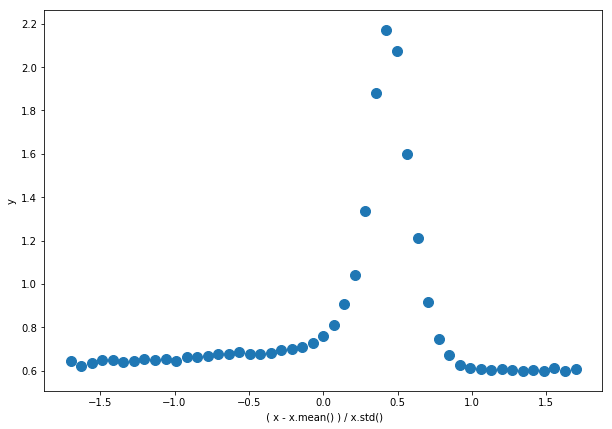

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(X1, y, s=100)
plt.xlabel(" ( x - x.mean() ) / x.std()")
plt.ylabel("y")

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [12]:
from sklearn.svm import SVR

In [13]:
X1.shape

(49L,)

In [16]:
X1 = X1.reshape(-1,1)
X1.shape

(49L, 1L)

In [14]:
from sklearn.metrics import mean_absolute_error

In [187]:
ccc = np.logspace(-1,2,20)
ccc2=np.logspace(-1,5,20)

In [142]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [143]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y, test_size=0.3, random_state=12345)

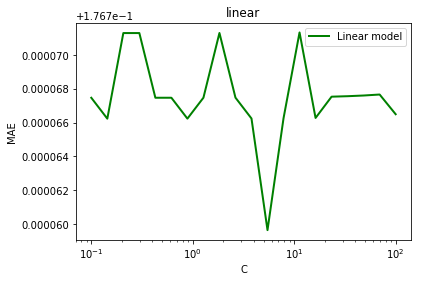

наилучшее C = 5.45559478117
минимальная ошибка = 0.176759638401


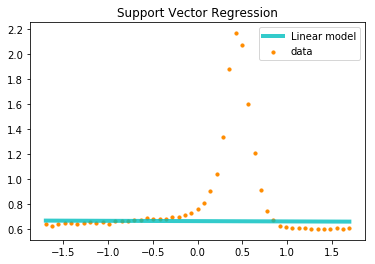

In [121]:
lin_err=[]
for i in ccc:
    svr_lin = SVR(kernel='linear', C=i ,epsilon=0.01)
    y_lin = svr_lin.fit(X1, y).predict(X1)
    lin_err.append(mean_absolute_error(y_lin, y))
    
plt.semilogx(ccc, lin_err, color='green', lw=2, label='Linear model')
plt.xlabel('C')
plt.ylabel('MAE')
plt.title('linear')
plt.legend()
plt.show()

best_C1 = ccc[lin_err.index(min(lin_err))]
print("наилучшее C = " + str(best_C1))
print("минимальная ошибка = " + str(min(lin_err)))

svr_lin = SVR(kernel='linear', C=best_C1 ,epsilon=0.01)
y_lin = svr_lin.fit(X1, y).predict(X1)
plt.scatter(X1, y, color='darkorange', label='data', s = 10)
plt.plot(X1, y_lin, color='c', lw=4, label='Linear model', alpha = 0.8)
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [188]:
lin_MAE_train = []
lin_MAE_test = []
for i in ccc2:
    lin_clf_i = SVR(kernel= 'linear', C=i, epsilon=0.01)
    lin_clf_i.fit(X1_train, Y1_train)
    lin_pred_i_train = lin_clf_i.predict(X1_train)
    lin_pred_i_test = lin_clf_i.predict(X1_test)
    lin_MAE_train.append(mean_absolute_error(lin_pred_i_train, Y1_train))
    lin_MAE_test.append(mean_absolute_error(lin_pred_i_test, Y1_test)) 

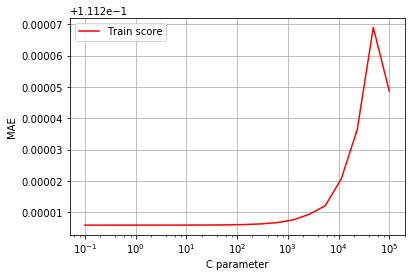

In [189]:
plt.plot(ccc2, lin_MAE_train, color='red', label='Train score')
pyplot.xscale('log')
plt.grid('on')
plt.xlabel('C parameter')
plt.ylabel('MAE')
plt.legend()

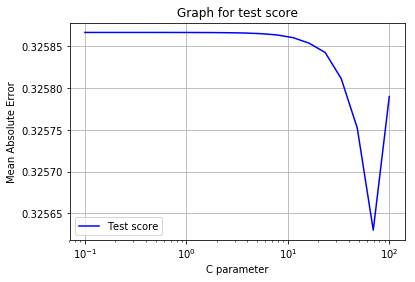

In [190]:
plt.plot(ccc, lin_MAE_test, color='blue', label='Test score')
pyplot.xscale('log')
plt.grid('on')
plt.title('Graph for test score')
plt.xlabel('C parameter')
plt.ylabel('Mean Absolute Error')
plt.legend()

Вывод: в линейной модели нет ни недообучения, ни переобучения

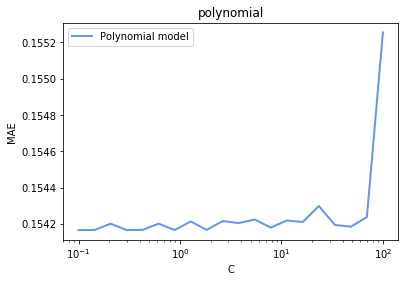

наилучшее C = 0.1
минимальная ошибка = 0.154165408997


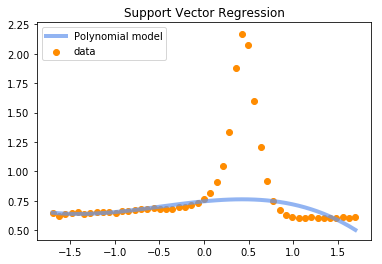

In [122]:
pol_err=[]
for i in ccc:
    svr_poly = SVR(kernel='poly', C=i , degree = 3, gamma = 6, coef0 = 1,epsilon=0.01)
    y_poly = svr_poly.fit(X1, y).predict(X1)
    pol_err.append(mean_absolute_error(y_poly, y))

plt.semilogx(ccc, pol_err, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('C')
plt.ylabel('MAE')
plt.title('polynomial')
plt.legend()
plt.show()

best_C2 = ccc[pol_err.index(min(pol_err))]
print("наилучшее C = " + str(best_C2))
print("минимальная ошибка = " + str(min(pol_err)))

svr_poly = SVR(kernel='poly', C= best_C2, degree = 3, gamma = 6, coef0 = 1,epsilon=0.01)
y_poly = svr_poly.fit(X1, y).predict(X1)

plt.scatter(X1, y, color='darkorange', label='data')
plt.plot(X1, y_poly, color='cornflowerblue', lw=4, label='Polynomial model', alpha = 0.7)
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [206]:
ccc3 = np.logspace(-1,5,6)

In [207]:
pol_MAE_train = []
pol_MAE_test = []
for i in ccc3:
    pol_clf_i = SVR(kernel= 'poly', C=i, epsilon=0.01, degree=3, gamma=6, coef0=1)
    pol_clf_i.fit(X1_train, Y1_train)
    pol_pred_i_train = pol_clf_i.predict(X1_train)
    pol_pred_i_test = pol_clf_i.predict(X1_test)
    pol_MAE_train.append(mean_absolute_error(pol_pred_i_train, Y1_train))
    pol_MAE_test.append(mean_absolute_error(pol_pred_i_test, Y1_test))

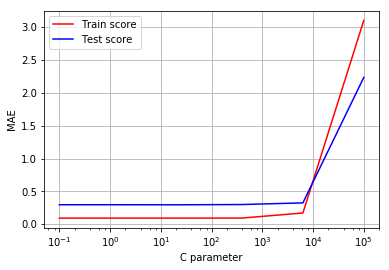

In [210]:
plt.plot(ccc3, pol_MAE_train, color='red', label='Train score')
plt.plot(ccc3, pol_MAE_test, color='blue', label='Test score')
pyplot.xscale('log')
plt.grid('on')
plt.xlabel('C parameter')
plt.ylabel('MAE')
plt.legend()

вывод: недообучение при больших С

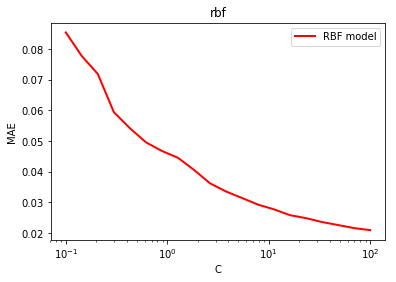

наилучшее C = 100.0
 минимальная ошибка= 0.0209330691791


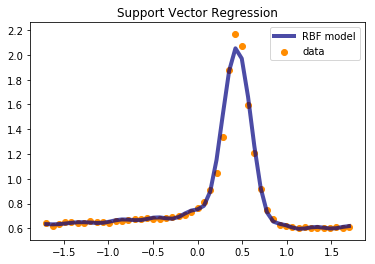

In [128]:
rbf_err=[]
for i in ccc:
    svr_rbf = SVR(kernel='rbf', C=i, gamma = 6, coef0 = 1, epsilon=0.01)
    y_rbf = svr_rbf.fit(X1, y).predict(X1)
    rbf_err.append(mean_absolute_error(y_rbf, y))
    
plt.semilogx(ccc, rbf_err, color='red', lw=2, label='RBF model')
plt.xlabel('C')
plt.ylabel('MAE')
plt.title('rbf')
plt.legend()
plt.show()

best_C3 = ccc[rbf_err.index(min(rbf_err))]
print("наилучшее C = " + str(best_C3))
print(" минимальная ошибка= " + str(min(rbf_err)))

svr_rbf = SVR(kernel='rbf', C= best_C3, gamma = 6, coef0 = 1, epsilon=0.01)
y_rbf = svr_rbf.fit(X1, y).predict(X1)

plt.scatter(X1, y, color='darkorange', label='data')
plt.plot(X1, y_rbf, color='navy', lw=4, label='RBF model',alpha = 0.7)
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [185]:
rbf_MAE_train = []
rbf_MAE_test = []

for i in ccc2:
    rbf_clf_i = SVR(kernel= 'rbf', C=i, epsilon=0.01, gamma=6, coef0=1)
    rbf_clf_i.fit(X1_train, Y1_train)
    rbf_pred_i_train = rbf_clf_i.predict(X1_train)
    rbf_pred_i_test = rbf_clf_i.predict(X1_test)
    rbf_MAE_train.append(mean_absolute_error(rbf_pred_i_train, Y1_train))
    rbf_MAE_test.append(mean_absolute_error(rbf_pred_i_test, Y1_test))

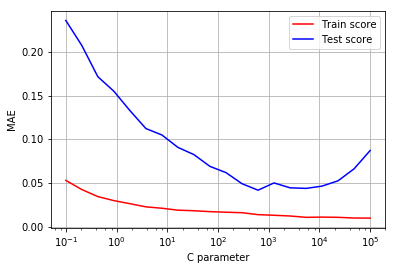

In [186]:
plt.plot(ccc2, rbf_MAE_train, color='red', label='Train score')
plt.plot(ccc2, rbf_MAE_test, color='blue', label='Test score')
pyplot.xscale('log')
plt.grid('on')
plt.xlabel('C parameter')
plt.ylabel('MAE')
plt.legend()

вывод: при больших значениях С, в rbf будет переобучение

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [64]:
from pandas import DataFrame
from pandas import read_csv
df = read_csv("/Users/AliceP/Desktop/IAD/war_and_peace_es.txt",names=["word"] )
df["label"]=1
df2 = read_csv("/Users/AliceP/Desktop/IAD/war_and_peace_en.txt", names=["word"] )
df2["label"]=0
df= df.append(df2,ignore_index=True)
df.columns.name = "index"


In [65]:
# like this

df.head()

index,word,label
0,guerra,1
1,pace,1
2,lev,1
3,nicoevic,1
4,tolstj,1


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [66]:
RND_SEED = 123

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["word"], df["label"], test_size = 0.2, train_size = 0.8, random_state = RND_SEED)

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [175]:
C_array = np.logspace(-1,1,10)

In [182]:
for (n_min,n_max) in [(1,2),(1,3),(1,4),(2,2),(2,3),(2,4),(3,3),(3,4),(4,4)]:
    print("n-gram_range " +"(" + str(n_min)+","+ str(n_max)+ ")")
    for c in C_array:
        # build the pipeline
        ppl = Pipeline([
              ('ngram', CountVectorizer(ngram_range=(n_min, n_max), analyzer='char')),
              ('clf',   LinearSVC(C = c))
          ])
        # train the classifier
        model = ppl.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print ("accuracy score for c = " + str(c)+" : " + str(accuracy_score(y_test, y_pred)))

n-gram_range (1,2)
accuracy score for c = 0.1 : 0.907496711968
accuracy score for c = 0.16681005372 : 0.910565541429
accuracy score for c = 0.278255940221 : 0.90705830776
accuracy score for c = 0.464158883361 : 0.911880754055
accuracy score for c = 0.774263682681 : 0.912319158264
accuracy score for c = 1.29154966501 : 0.915387987725
accuracy score for c = 2.15443469003 : 0.917580008768
accuracy score for c = 3.5938136638 : 0.918456817185
accuracy score for c = 5.99484250319 : 0.918456817185
accuracy score for c = 10.0 : 0.917141604559
n-gram_range (1,3)
accuracy score for c = 0.1 : 0.940815431828
accuracy score for c = 0.16681005372 : 0.944761069706
accuracy score for c = 0.278255940221 : 0.945199473915
accuracy score for c = 0.464158883361 : 0.94695309075
accuracy score for c = 0.774263682681 : 0.947391494958
accuracy score for c = 1.29154966501 : 0.946514686541
accuracy score for c = 2.15443469003 : 0.943007452872
accuracy score for c = 3.5938136638 : 0.942130644454
accuracy score fo

Вывод: самое лучшее accuracy для (1,4) n-грамм, в некоторых случаях увеличение С делает точность хуже, в некоторых наоборот, в некоторых нет зависимости, но С было в диапазоне np.logspace(-1,1,10) , если взять большее С, то может можно увидеть зависимость, но будет очень долго считать.

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [90]:
RND_SEED = 123
df1= df.sample(n=len(df), random_state=RND_SEED)

In [93]:
df1.head()

index,word,label
8872,how,0
8223,evening,0
4691,questo,1
1956,sua,1
9298,sound,0


In [97]:
df1= df1.reset_index(drop=True)
df1.head()

index,word,label
0,how,0
1,evening,0
2,questo,1
3,sua,1
4,sound,0


In [108]:
df1=df1[:3000]

In [112]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df1.index.values, df1["label"], test_size = 0.2, train_size = 0.8, random_state = RND_SEED)

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [211]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

In [215]:
!pip install editdistance

  Using cached editdistance-0.3.1.tar.gz
  Running setup.py bdist_wheel for editdistance: started
  Running setup.py bdist_wheel for editdistance: finished with status 'done'
  Stored in directory: C:\Users\AliceP\AppData\Local\pip\Cache\wheels\21\8a\17\3504c6be142329daaa3f95684d1df4dde923c941dff68efc28
Successfully built editdistance


### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.